## BBC News Summarization Mini Project
## EDA & Data Cleaning 

In [3]:
# importing packages
import os
import re
import sklearn

import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import gensim
from gensim.corpora.dictionary import Dictionary

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer


from tensorflow.keras.preprocessing.text import Tokenizer

import string


from gensim.models import word2vec

In [37]:
# converting txt files to dataframe
# data_folder="C:/Users/User/Desktop/AIAP/a8/news_articles"
# folders=["business","entertainment","politics","sport","tech"]
# x=[]
# y=[]


# for i in folders:
#     files=os.listdir(data_folder+'/'+i)
#     for text_file in files:
#         file_path=data_folder + '/'+i+'/'+text_file
#         with open(file_path,'rb') as f:
#             data=f.read()
#         x.append(data)
#         y.append(i)
        
# data={'news':x,'type':y}
# news_article = pd.DataFrame(data)
# news_article.to_csv('news_article.csv', index=False)      

# data_folder="C:/Users/User/Desktop/AIAP/a8/summaries"
# folders=["business","entertainment","politics","sport","tech"]
# x=[]
# y=[]


# for i in folders:
#     files=os.listdir(data_folder+'/'+i)
#     for text_file in files:
#         file_path=data_folder + '/'+i+'/'+text_file
#         with open(file_path,'rb') as f:
#             data=f.read()
#         x.append(data)
#         y.append(i)
        
# data={'summary':x,'type':y}
# news_summary = pd.DataFrame(data)
# news_summary.to_csv('news_summary.csv', index=False)      

# df['news'] = news_article['news']
# df['summary'] = news_summary['summary']
# df['type']=news_article['type']

In [44]:
# df.to_csv('bbc_news.csv', index=False)      

In [2]:
# read data from csv
df = pd.read_csv('bbc_news.csv')

In [3]:
df.head()

,news,summary,type
0,b'Ad sales boost Time Warner profit\n\nQuarter...,"b""TimeWarner said fourth quarter sales rose 2%...",business
1,b'Dollar gains on Greenspan speech\n\nThe doll...,b'The dollar has hit its highest level against...,business
2,b'Yukos unit buyer faces loan claim\n\nThe own...,b'Yukos\' owner Menatep Group says it will ask...,business
3,b'High fuel prices hit BA\'s profits\n\nBritis...,"b'Rod Eddington, BA\'s chief executive, said t...",business
4,"b""Pernod takeover talk lifts Domecq\n\nShares ...","b""Pernod has reduced the debt it took on to fu...",business


### Basic EDA

In [4]:
# Exploring types of news available in the dataset
df.type.astype('category').value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: type, dtype: int64

In [5]:
# checking for null data
df.isnull().sum()

news       0
summary    0
type       0
dtype: int64

In [6]:
# checking for duplicated data
df.duplicated().sum()

98

There are duplicated rows.

C:\Users\User\anaconda3\envs\aiap2021\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\envs\aiap2021\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


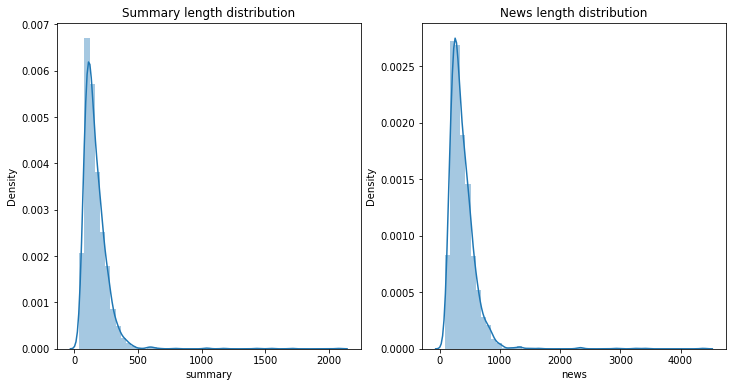

In [7]:
news_lens = df['news'].str.split().apply(len)
summary_lens = df['summary'].str.split().apply(len)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.distplot(summary_lens)
plt.title('Summary length distribution')

plt.subplot(1, 2, 2)
sns.distplot(news_lens)
plt.title('News length distribution')

plt.show()

The length of summary given in the dataset is mostly below 500 words, while the length of news article is mostly below 1000 words

Looking at some of the news articles.....

In [8]:
df['news'][0]

'b\'Ad sales boost Time Warner profit\\n\\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (\\xc2\\xa3600m) for the three months to December, from $639m year-earlier.\\n\\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\\n\\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\\\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers

In [9]:
df['news'][1]

'b\'Dollar gains on Greenspan speech\\n\\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\\n\\nAnd Alan Greenspan highlighted the US government\\\'s willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan\\\'s speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. "I think the chairman\\\'s taking a much more sanguine view on the current account deficit than he\\\'s taken for some time," said Robert Sinche, head of currency strategy at Bank of America in New York. "He\\\'s taking a longer-term view, laying out a se

### Data Cleaning

In [10]:
# Check for artifacts '\'
df['news'].str.contains("\\", regex=False).sum()

2225

In [11]:
# Check for artifacts '\'
df['news'].str.contains("\\n", regex=False).sum()

2225

In [12]:
## regex method - remove '\n'
x = re.sub(r"\\n", " ", df['news'][0])
## remove '\'
x = re.sub(r"\\", " ", x)
## remove parenthesis
x = re.sub(r'\([^)]*\)', '', x)
## removing double spaces with single space
x = re.sub('\s\s+', " ", x)
# remove 'b''
x = re.sub(r"b'","",x)
## substitute % with 'percent'
x = re.sub(r"[%]", "percent",x)

print(df['news'][0])
print('==post substitution')
print(x)

b'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (\xc2\xa3600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will tr

In [1]:
# creating clean text function
def clean_text(text, remove_stopwords = True):
    ## regex method - remove '\n'
    cleantext = re.sub(r"\\n", " ", text)
    ## remove '\BA'
    cleantext = re.sub(r"\\BA", " ", cleantext)
    ## remove '\'
    cleantext = re.sub(r"\\", " ", cleantext)
    ## remove parenthesis
    cleantext = re.sub(r'\([^)]*\)', '', cleantext)
    ## removing double spaces with single space
    cleantext = re.sub('\s\s+', " ", cleantext)
    # remove 'b''
    cleantext = re.sub(r"b'","",cleantext)
    ## substitute % with 'percent'
    cleantext = re.sub(r"[%]", "percent",cleantext)
    ## substitute $ with 'USD'
    cleantext = re.sub(r"[$]", "USD",cleantext)
    ## remove '
    cleantext = re.sub(r"\'", "", cleantext)
    ## remove '-'
    cleantext = re.sub(r"[-']", "", cleantext)
   ## remove '""'
    cleantext = re.sub(r"[\"]", "", cleantext)
    ## remove all b"
    cleantext = cleantext.strip('b"')
    ## remove xc2
    cleantext = re.sub(r"xc2", "", cleantext)
    # remove xa359m
    cleantext = re.sub(r"xa359m", "", cleantext)
    # remove xa35.7n 
    cleantext = re.sub(r"xa35.7n ", "", cleantext)
    # remove xa3160m
    cleantext = re.sub(r"xa3160m", "", cleantext)
    # remove xa35.7bn
    cleantext = re.sub(r"xa35.7bn ", "", cleantext)
    # remove xa3125m
    cleantext = re.sub(r"xa3125m", "", cleantext)
    # remove xa375m
    cleantext = re.sub(r"xa375m", "", cleantext)
    # remove xa3106m
    cleantext = re.sub(r"xa3106m", "", cleantext)
    # remove xa31.97bn
    cleantext = re.sub(r"xa31.97bn", "", cleantext)
    # remove xa3250m
    cleantext = re.sub(r"xa3250m", "", cleantext)
    # remove xa36
    cleantext = re.sub(r"xa36", "", cleantext)
    # remove xa310
    cleantext = re.sub(r"xa310", "", cleantext)
    # remove xa34
    cleantext = re.sub(r"xa34", "", cleantext)
    # remove xa32.50
    cleantext = re.sub(r"xa32.50", "", cleantext)
    # lower case
    cleantext = cleantext.lower()
    
    
    if remove_stopwords:
        cleantext = cleantext.split()
        stops = set(stopwords.words("english"))
        cleantext = [w for w in cleantext if not w in stops]
        cleantext = " ".join(cleantext)

    return cleantext
    
    

In [5]:
# read data from csv
df = pd.read_csv('bbc_news.csv')

In [26]:
# clean one row of news to check
clean_text(df['news'][0])

'ad sales boost time warner profit quarterly profits us media giant timewarner jumped 76percent usd1.13bn three months december, usd639m yearearlier. firm, one biggest investors google, benefited sales highspeed internet connections higher advert sales. timewarner said fourth quarter sales rose 2percent usd11.1bn usd10.9bn. profits buoyed oneoff gains offset profit dip warner bros, less users aol. time warner said friday owns 8percent searchengine google. internet business, aol, mixed fortunes. lost 464,000 subscribers fourth quarter profits lower preceding three quarters. however, company said aol underlying profit exceptional items rose 8percent back stronger internet advertising revenues. hopes increase subscribers offering online service free timewarner internet customers try sign aol existing customers highspeed broadband. timewarner also restate 2000 2003 results following probe us securities exchange commission , close concluding. time warner fourth quarter profits slightly bett

In [6]:
# clean news and place in a new column
df['cleannews'] = df['news'].apply(lambda x: clean_text(x))

In [7]:
# clean summary and place in a new column
df['cleansummary'] = df['summary'].apply(lambda x: clean_text(x))

In [8]:
df

,news,summary,type,cleannews,cleansummary
0,b'Ad sales boost Time Warner profit\n\nQuarter...,"b""TimeWarner said fourth quarter sales rose 2%...",business,ad sales boost time warner profit quarterly pr...,timewarner said fourth quarter sales rose 2per...
1,b'Dollar gains on Greenspan speech\n\nThe doll...,b'The dollar has hit its highest level against...,business,dollar gains greenspan speech dollar hit highe...,dollar hit highest level euro almost three mon...
2,b'Yukos unit buyer faces loan claim\n\nThe own...,b'Yukos\' owner Menatep Group says it will ask...,business,yukos unit buyer faces loan claim owners embat...,yukos owner menatep group says ask rosneft rep...
3,b'High fuel prices hit BA\'s profits\n\nBritis...,"b'Rod Eddington, BA\'s chief executive, said t...",business,high fuel prices hit ba profits british airway...,"rod eddington, ba chief executive, said result..."
4,"b""Pernod takeover talk lifts Domecq\n\nShares ...","b""Pernod has reduced the debt it took on to fu...",business,pernod takeover talk lifts domecq shares uk dr...,pernod reduced debt took fund seagram purchase...
...,...,...,...,...,...
2220,b'BT program to beat dialler scams\n\nBT is in...,b'BT is introducing two initiatives to help be...,tech,bt program beat dialler scams bt introducing t...,bt introducing two initiatives help beat rogue...
2221,b'Spam e-mails tempt net shoppers\n\nComputer ...,b'A third of them read unsolicited junk e-mail...,tech,spam emails tempt net shoppers computer users ...,third read unsolicited junk email 66percent bu...
2222,b'Be careful how you code\n\nA new European di...,"b""This goes to the heart of the European proje...",tech,careful code new european directive could put ...,"goes heart european project, even care softwar..."
2223,b'US cyber security chief resigns\n\nThe man m...,"b""Amit Yoran was director of the National Cybe...",tech,us cyber security chief resigns man making sur...,amit yoran director national cyber security di...


### N-grams

In [9]:
# remove punctuation
df_ngram = df.copy()

punct_to_remove = string.punctuation

def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', punct_to_remove))

df_ngram['cleannews'] = df['cleannews'].apply(lambda text:remove_punctuation(text))

In [10]:
all_news_words = "".join(str(df_ngram['cleannews'].tolist()))

In [11]:
lemma = WordNetLemmatizer()
token_words = word_tokenize(all_news_words)
token_words = [lemma.lemmatize(word) for word in token_words]

In [12]:
(pd.Series(nltk.ngrams(token_words, 2)).value_counts())[:60]

(', ,)                  2224
(last, year)             464
(said, mr)               363
(told, bbc)              362
(mr, blair)              333
(prime, minister)        318
(mr, brown)              255
(chief, executive)       206
(said, would)            194
(last, week)             188
(tony, blair)            185
(mobile, phone)          183
(bbc, news)              178
(general, election)      177
(can, not)               166
(new, york)              165
(six, nation)            162
(year, ago)              160
(mr, howard)             159
(liberal, democrat)      157
(number, one)            147
(first, time)            140
(michael, howard)        129
(next, year)             120
(human, right)           118
(interest, rate)         113
(gordon, brown)          113
(bbc, radio)             112
(two, year)              105
(also, said)             105
(home, secretary)        104
(news, website)           98
(three, year)             96
(five, year)              95
(last, month) 

The n-gram showed some of the words that commonly appear together.

### Embedding - Word2Vec

In [14]:
embedding_size = 20

In [15]:
sentences = [s for s in [s.strip().lower().split(" ") for i in df["cleannews"].values for s in re.split("\.", str(i))] if len(s) > 2]

In [16]:
word2vec_model = word2vec.Word2Vec(sentences, size=embedding_size, window=5, min_count=5, workers=4)

In [17]:
lookup_words = ["sales", "internet", "profits", "equities", "employment"]
words_to_visualize = [] # Save for visualization below

for w in lookup_words:
    print(w)
    for s in word2vec_model.wv.most_similar([w]):
        print(s)
        words_to_visualize.append(s[0])

sales
('january', 0.9853882789611816)
('december', 0.9851281046867371)
('released', 0.9851269721984863)
('2004,', 0.9814618825912476)
('2005', 0.979648232460022)
('march', 0.9794942140579224)
('2', 0.9774230718612671)
('record', 0.9763262867927551)
('february', 0.9758732318878174)
('growth', 0.9740909934043884)
internet
('computer', 0.9946120977401733)
('networks', 0.9934177398681641)
('net', 0.9933948516845703)
('using', 0.9928547143936157)
('data', 0.9927489757537842)
('free', 0.99129718542099)
('protect', 0.9908171892166138)
('access', 0.9905845522880554)
('calls', 0.9904556274414062)
('personal', 0.9901187419891357)
profits
('1percent', 0.9965593814849854)
('4percent', 0.9956787824630737)
('period', 0.9952304363250732)
('early', 0.994803786277771)
('peak', 0.9947211742401123)
('5percent', 0.9938369989395142)
('7percent', 0.9929097294807434)
('honours', 0.9927937984466553)
('profit', 0.9923673868179321)
('christmas', 0.9922081828117371)
equities
('allblack', 0.9890502691268921)
('mo

In [18]:
lookup_words = [ "china", "us", "singapore"]
words_to_visualize = [] # Save for visualization below

for w in lookup_words:
    print(w)
    for s in word2vec_model.wv.most_similar([w]):
        print(s)
        words_to_visualize.append(s[0])

china
('crude', 0.9974966645240784)
('blogger', 0.9972741603851318)
('stocks', 0.9971075654029846)
('outside', 0.9970067143440247)
('food', 0.9969897270202637)
('chinese', 0.9969824552536011)
('refuses', 0.9968960285186768)
('developed', 0.9968746304512024)
('governing', 0.9968698024749756)
('alqaeda', 0.9967982769012451)
us
('re,', 0.9630869626998901)
('storyline', 0.9600231647491455)
('350', 0.9543659687042236)
('emi', 0.9535227417945862)
('largest', 0.9511752724647522)
('biggest', 0.951113760471344)
('poorest', 0.9506803750991821)
('helsinki', 0.9495745301246643)
('usd50', 0.9489704370498657)
('celebrations', 0.9483047723770142)
singapore
('slowdown', 0.9982930421829224)
('hot', 0.9978558421134949)
('output', 0.9974445104598999)
('grow', 0.9970898628234863)
('earmarked', 0.9969414472579956)
('expansion', 0.9968308210372925)
('falling', 0.9966845512390137)
('begin', 0.9965806007385254)
('pace', 0.9964683055877686)
('surge', 0.9963529706001282)


In [27]:
lookup_words = [ "google", "timewarner", "microsoft", "sony", "paypal"]
words_to_visualize = [] # Save for visualization below

for w in lookup_words:
    print(w)
    for s in word2vec_model.wv.most_similar([w]):
        print(s)
        words_to_visualize.append(s[0])

google
('culture', 0.9979655742645264)
('development', 0.9979594945907593)
('declined', 0.9979082345962524)
('technologies,', 0.9977288246154785)
('aids', 0.9976946115493774)
('technology,', 0.997612476348877)
('written', 0.997477114200592)
('equipment', 0.9974114894866943)
('bob', 0.9973887205123901)
('tv,', 0.9972626566886902)
timewarner
('incentives', 0.9876151084899902)
('relationships', 0.9873052835464478)
('abandonment', 0.9872902631759644)
('integral', 0.986640453338623)
('entire', 0.9859367609024048)
('sick', 0.9857255816459656)
('bulk', 0.9853116869926453)
('memories', 0.9852978587150574)
('bottom', 0.9851531982421875)
('houses', 0.9850760102272034)
microsoft
('bill', 0.9913493394851685)
('invest', 0.9912869930267334)
('invested', 0.9906330108642578)
('havenots', 0.9903608560562134)
('talent,', 0.9899615049362183)
('transport,', 0.9897201061248779)
('parry', 0.9896721839904785)
('bid', 0.9895447492599487)
('boy,', 0.9895176291465759)
('seek', 0.9894646406173706)
sony
('attende

In terms of country names, similar words output may not make sense, but for commonly found words in news articles like 'profits', 'employment', 'internet' and 'sales', similar words appear to be those words that would normally appear adjacent to those words.

### Visualize Processed Text

In [30]:
# print unprocessed data (7 rows)
def print_head(limit=7):
    for idx in range(limit):
        print(f'Summary: {df["summary"][idx]}\nText: {df["news"][idx]}\n')
print_head()

Summary: b"TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn.Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (\xc2\xa3600m) for the three months to December, from $639m year-earlier.However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues.Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters.Time Warner's fourth quarter profits were slightly better than analysts' expectations."
Text: b'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant

In [59]:
# print processed data (7 rows)
def print_head(limit=7):
    for idx in range(limit):
        print(f'Cleaned Summary: {df["cleansummary"][idx]} \nCleaned News: {df["cleannews"][idx]}\n')
print_head()

Cleaned Summary: timewarner said fourth quarter sales rose 2percent usd11.1bn usd10.9bn.for fullyear, timewarner posted profit usd3.36bn, 27percent 2003 performance, revenues grew 6.4percent usd42.09bn.quarterly profits us media giant timewarner jumped 76percent usd1.13bn three months december, usd639m yearearlier.however, company said aols underlying profit exceptional items rose 8percent back stronger internet advertising revenues.its profits buoyed oneoff gains offset profit dip warner bros, less users aol.for 2005, timewarner projecting operating earnings growth around 5percent, also expects higher revenue wider profit margins.it lost 464,000 subscribers fourth quarter profits lower preceding three quarters.time warners fourth quarter profits slightly better analysts expectations. 
Cleaned News: ad sales boost time warner profit quarterly profits us media giant timewarner jumped 76percent usd1.13bn three months december, usd639m yearearlier. firm, one biggest investors google, bene

In [22]:
# print processed data (10 rows)
def print_head(limit=10):
    for idx in range(limit):
        print(f'Cleaned Summary: {df["cleansummary"][idx]} \nCleaned News: {df["cleannews"][idx]}\n')
print_head()

Cleaned Summary: timewarner said fourth quarter sales rose 2percent usd11.1bn usd10.9bn.for fullyear, timewarner posted profit usd3.36bn, 27percent 2003 performance, revenues grew 6.4percent usd42.09bn.quarterly profits us media giant timewarner jumped 76percent usd1.13bn three months december, usd639m yearearlier.however, company said aols underlying profit exceptional items rose 8percent back stronger internet advertising revenues.its profits buoyed oneoff gains offset profit dip warner bros, less users aol.for 2005, timewarner projecting operating earnings growth around 5percent, also expects higher revenue wider profit margins.it lost 464,000 subscribers fourth quarter profits lower preceding three quarters.time warners fourth quarter profits slightly better analysts expectations. 
Cleaned News: ad sales boost time warner profit quarterly profits us media giant timewarner jumped 76percent usd1.13bn three months december, usd639m yearearlier. firm, one biggest investors google, bene

### Workings

In [62]:
# train, val, test split
X_train, X_test = train_test_split(df, test_size=0.2, random_state = 42)
X_train, X_val = train_test_split(X_train, test_size=0.2, random_state = 42)

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1424, 5)
(356, 5)
(445, 5)


In [63]:
X_train.head()

,news,summary,type,cleannews,cleansummary
0,b'Lesotho textile workers lose jobs\n\nSix for...,"b'""We understand that some (owners)... were co...",business,lesotho textile workers lose jobs six foreigno...,understand ... complaining south african rand ...
1,b'T in the Park sells out in days\n\nTickets f...,"b""Green Day, the Foo Fighters and Keane are am...",entertainment,park sells days tickets scotland biggest music...,"green day, foo fighters keane among acts alrea..."
2,"b""O'Driscoll saves Irish blushes\n\nTwo moment...","b""An O'Gara penalty put Ireland more than a co...",sport,odriscoll saves irish blushes two moments magi...,ogara penalty put ireland converted try ahead ...
3,b'How the Academy Awards flourished\n\nThe 77t...,"b'The first film to win was Wings, which starr...",entertainment,academy awards flourished 77th annual academy ...,"first film win wings, starred clara bow silent..."
4,"b""Europe backs digital TV lifestyle\n\nHow peo...",b'Many feel that the most difficult and challe...,tech,europe backs digital tv lifestyle people recei...,many feel difficult challenging area commissio...


In [84]:
countvectorizer = CountVectorizer()
df_cv = countvectorizer.fit_transform(df['news'])

In [90]:
countvectorizer.get_feature_names()

['00',
 '000',
 '0001',
 '000bn',
 '000m',
 '000s',
 '000th',
 '001',
 '001and',
 '001st',
 '004',
 '0051',
 '007',
 '01',
 '0100',
 '011',
 '0130',
 '02',
 '0200',
 '0227',
 '028',
 '03',
 '0300',
 '033',
 '037',
 '03bn',
 '04',
 '0400',
 '041',
 '04bn',
 '04m',
 '04secs',
 '05',
 '050',
 '050505',
 '0530',
 '0530gmt',
 '056',
 '05bn',
 '05m',
 '06',
 '060',
 '0619',
 '0630',
 '069',
 '06bn',
 '07',
 '070',
 '0700',
 '0710',
 '072',
 '0730',
 '07bn',
 '08',
 '080',
 '0800',
 '081',
 '0845',
 '086',
 '0870',
 '088',
 '08bn',
 '09',
 '0900',
 '093',
 '0950',
 '09bn',
 '09secs',
 '10',
 '100',
 '1000',
 '1000m',
 '1000th',
 '100bn',
 '100m',
 '100ml',
 '100s',
 '101',
 '102',
 '103',
 '1030',
 '104',
 '104m',
 '105',
 '105bn',
 '106',
 '106cm',
 '106m',
 '107',
 '108',
 '1080',
 '109',
 '10bn',
 '10cm',
 '10ft',
 '10k',
 '10km',
 '10m',
 '10s',
 '10secs',
 '10th',
 '10x7in',
 '11',
 '110',
 '1100',
 '110m',
 '110th',
 '111',
 '1115',
 '111m',
 '112',
 '113',
 '1130',
 '1130p',
 '113bn',


In [87]:
df_cv.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)